<a href="https://colab.research.google.com/github/Pramurta/Simple-Moving-Average-Strategy/blob/main/Simple_Moving_Average_Trading_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# This cell imports the yfinance library and fetches the historical stock data for Facebook (META) for the past 2 years.
# It then prints the head of the Open and Close prices and the entire DataFrame.
import yfinance as yf

meta = yf.Ticker("META") # Changed ticker to META
meta_stock_prices = meta.history(period="2y") # Changed DataFrame name and ticker

print("Facebook (META) Open Prices:") # Updated print statement
print(meta_stock_prices['Open'].head())

print("\nFacebook (META) Close Prices:") # Updated print statement
print(meta_stock_prices['Close'].head())

print("\nDataFrame head (first 5 rows):")
display(meta_stock_prices.head())

Facebook (META) Open Prices:
Date
2024-01-10 00:00:00-05:00    357.671577
2024-01-11 00:00:00-05:00    369.548579
2024-01-12 00:00:00-05:00    367.592232
2024-01-16 00:00:00-05:00    371.058075
2024-01-17 00:00:00-05:00    363.758958
Name: Open, dtype: float64

Facebook (META) Close Prices:
Date
2024-01-10 00:00:00-05:00    367.900116
2024-01-11 00:00:00-05:00    367.105652
2024-01-12 00:00:00-05:00    371.892181
2024-01-16 00:00:00-05:00    364.911011
2024-01-17 00:00:00-05:00    365.814606
Name: Close, dtype: float64

DataFrame head (first 5 rows):


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-10 00:00:00-05:00,357.671577,370.352983,356.589112,367.900116,22117200,0.0,0.0
2024-01-11 00:00:00-05:00,369.548579,370.194064,360.412386,367.105652,17205400,0.0,0.0
2024-01-12 00:00:00-05:00,367.592232,374.444361,366.976537,371.892181,19310000,0.0,0.0
2024-01-16 00:00:00-05:00,371.058075,373.004470,364.682626,364.911011,15306900,0.0,0.0
2024-01-17 00:00:00-05:00,363.758958,365.983440,356.122301,365.814606,12724800,0.0,0.0


In [18]:
# This cell imports the necessary libraries: pandas for data manipulation and matplotlib.pyplot for plotting.
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# This cell calculates two moving averages: a 10-day Moving Average (MA10) and a 50-day Moving Average (MA50).
# It then drops any rows with NaN values (which result from the initial MA calculations) and displays the head of the updated DataFrame.
meta_stock_prices['MA10'] = meta_stock_prices["Close"].rolling(10).mean() # Changed DataFrame and rolling window to 10
meta_stock_prices['MA50'] = meta_stock_prices["Close"].rolling(50).mean() # Changed DataFrame and rolling window to 50
meta_stock_prices = meta_stock_prices.dropna()
display(meta_stock_prices.head()) # Added display for better output

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA10,MA50
Date,,,,,,,,,
2024-03-21 00:00:00-04:00,511.681859,512.009874,503.033031,504.772736,9712500,0.0,0.0,493.806650,449.424213
2024-03-22 00:00:00-04:00,504.017223,506.969751,501.372869,506.582031,8120600,0.0,0.0,494.167508,452.197852
2024-03-25 00:00:00-04:00,502.814300,504.235880,497.296934,500.060577,8380600,0.0,0.0,496.099075,454.856950
2024-03-26 00:00:00-04:00,502.158225,506.999569,492.296573,492.972595,11205400,0.0,0.0,495.715350,457.278558
2024-03-27 00:00:00-04:00,496.362496,496.949052,485.198584,490.954498,9989700,0.0,0.0,495.545349,459.799428


In [20]:
# This cell implements the trading strategy: it adds a 'Shares' column.
# If the 10-day Moving Average is greater than the 50-day Moving Average, it assigns 1 (indicating a 'buy' or long position), otherwise it assigns 0.
#Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)

meta_stock_prices['Shares'] = [1 if meta_stock_prices.loc[ei, 'MA10']>meta_stock_prices.loc[ei, 'MA50'] else 0 for ei in meta_stock_prices.index]

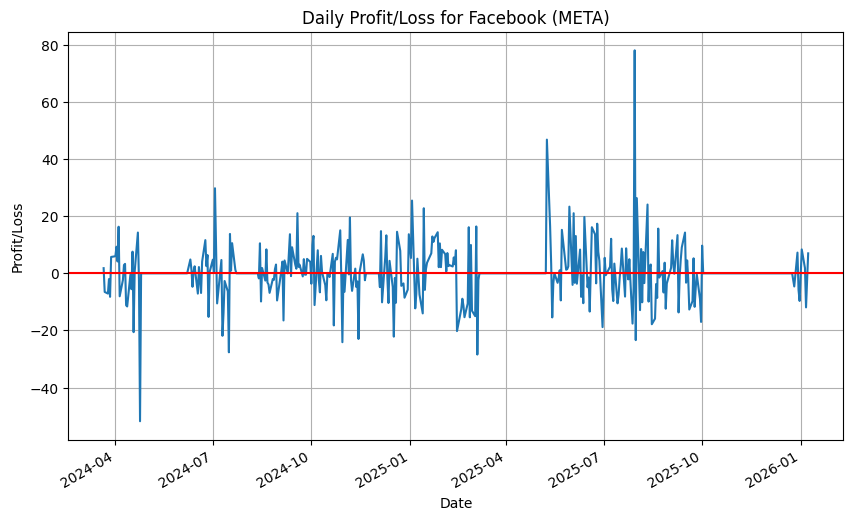

In [21]:
# This cell calculates the daily 'Profit' based on the trading strategy.
# If 'Shares' is 1, profit is calculated as (tomorrow's Close Price - today's Close Price). Otherwise, profit is 0.
# It then plots the daily profit/loss, with a red line indicating the zero-profit level.
#Add a new column "Profit" using List Comprehension, for any rows in meta_stock_prices, if Shares=1, the profit is calculated as the close price of
#tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a graph to show the Profit/Loss

meta_stock_prices['Close1'] = meta_stock_prices['Close'].shift(-1)
meta_stock_prices['Profit'] = [meta_stock_prices.loc[ei, 'Close1'] - meta_stock_prices.loc[ei, 'Close'] if meta_stock_prices.loc[ei, 'Shares']==1 else 0 for ei in meta_stock_prices.index]
plt.figure(figsize=(10, 6)) # Added figure size for better plotting
meta_stock_prices['Profit'].plot()
plt.axhline(y=0, color='red')
plt.title('Daily Profit/Loss for Facebook (META)') # Updated title
plt.xlabel('Date') # Added x-label
plt.ylabel('Profit/Loss') # Added y-label
plt.grid(True) # Added grid
plt.show() # Explicitly show plot

In [22]:
# This cell calculates the cumulative sum of the 'Profit' column to determine the 'wealth' accumulated over the trading period.
# The last few rows of the DataFrame, including the 'wealth' column, are then displayed.
#Use .cumsum() to calculate the accumulated wealth over the period

meta_stock_prices['wealth'] = meta_stock_prices['Profit'].cumsum()
display(meta_stock_prices.tail()) # Changed to display for better output

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA10,MA50,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,,
2026-01-05 00:00:00-05:00,651.010010,664.539978,647.750000,658.789978,12213700,0.0,0.0,660.997998,650.342729,1,660.619995,1.830017,100.550415
2026-01-06 00:00:00-05:00,659.570007,665.520020,651.900024,660.619995,11074400,0.0,0.0,661.182996,648.887092,1,648.690002,-11.929993,88.620422
2026-01-07 00:00:00-05:00,655.640015,659.150024,644.809998,648.690002,12846300,0.0,0.0,659.901996,647.105726,1,646.059998,-2.630005,85.990417
2026-01-08 00:00:00-05:00,645.880005,647.099976,635.719971,646.059998,11921700,0.0,0.0,658.013995,645.022764,1,653.059998,7.000000,92.990417
2026-01-09 00:00:00-05:00,645.440002,654.950012,642.849976,653.059998,11621500,0.0,0.0,656.564996,643.067411,1,NaN,NaN,NaN


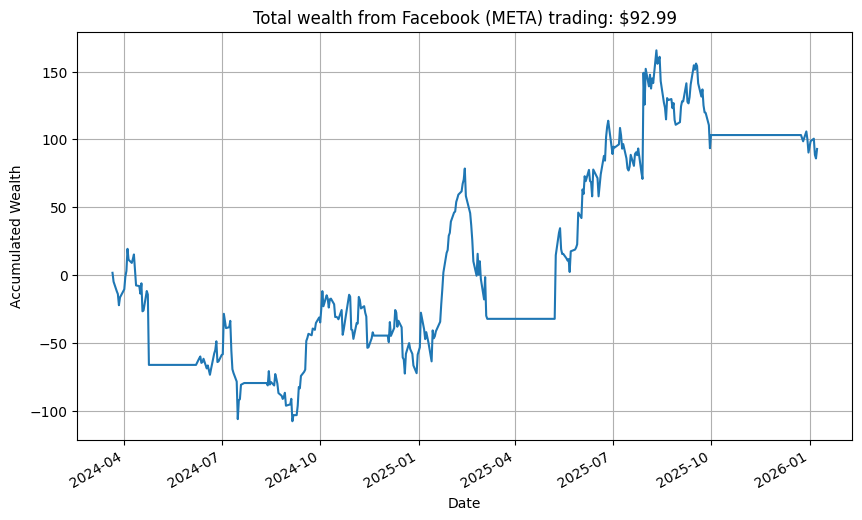

In [23]:
# This cell plots the 'wealth' over time, showing the growth of accumulated profit.
# The title includes the final accumulated wealth amount.
#plot the wealth to show the growth of profit over the period

plt.figure(figsize=(10, 6)) # Added figure size for better plotting
meta_stock_prices['wealth'].plot()
plt.title('Total wealth from Facebook (META) trading: ${:.2f}'.format(meta_stock_prices.loc[meta_stock_prices.index[-2], 'wealth'])) # Updated title and formatting
plt.xlabel('Date') # Added x-label
plt.ylabel('Accumulated Wealth') # Added y-label
plt.grid(True) # Added grid
plt.show() # Explicitly show plot